<a href="https://colab.research.google.com/github/baranikeshava19/CodSoft/blob/main/Spam_SMS_Detection_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving spam (2).csv to spam (2).csv
  Label                                            Message
0   ham  Go until Jurong Point, crazy... Available only...
1   ham                    Okay, I'm just joking with you.
2  spam  Free entry in a weekly competition to win FA C...
3   ham  Don't say it so early... You should wait and s...
4   ham  No, I don’t think he goes to USF, he lives aro...
Accuracy: 0.6667
Classification Report:
              precision    recall  f1-score   support

         ham       0.67      0.40      0.50         5
        spam       0.67      0.86      0.75         7

    accuracy                           0.67        12
   macro avg       0.67      0.63      0.62        12
weighted avg       0.67      0.67      0.65        12



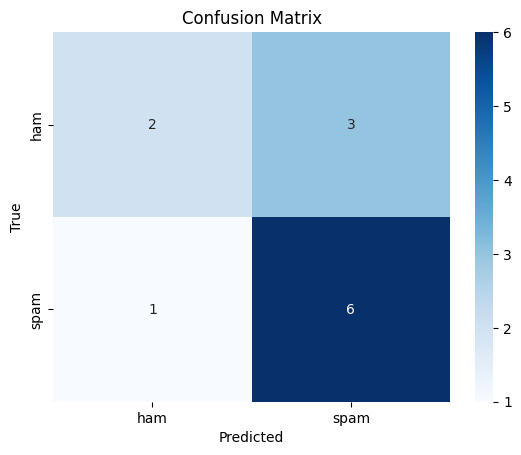


Custom Message Test Result: Spam


In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Step 1: Upload the file to Google Colab
from google.colab import files
uploaded = files.upload()

# Step 2: Load the dataset (adjust the file name if needed)
file_name = list(uploaded.keys())[0]  # Get the name of the uploaded file
df = pd.read_csv(file_name)

# Check the data format
print(df.head())

# Preprocessing the data (we assume 'Label' column is target and 'Message' is the text)
X = df['Message']  # Features (SMS messages)
y = df['Label']    # Labels (ham or spam)

# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)  # Fit and transform the training data
X_test_tfidf = tfidf.transform(X_test)  # Transform the test data using the same vocabulary

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=['ham', 'spam'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 3: Test a custom message
custom_message = "Congratulations! You've won a $1000 gift card. Claim now!"  # Example message to test
custom_message_tfidf = tfidf.transform([custom_message])  # Apply the same TF-IDF transformation to the custom message
custom_pred = nb_classifier.predict(custom_message_tfidf)[0]  # Predict if it's spam or ham

# Output the classification result
if custom_pred == 'spam':
    print("\nCustom Message Test Result: Spam")
else:
    print("\nCustom Message Test Result: Not Spam")
